In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
upload = files.upload()

Saving card_transdata.csv to card_transdata.csv


In [3]:
df = pd.read_csv("card_transdata.csv", sep=',')

In [4]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


Exploratory Data Analysis

In [7]:
plt.rcParams["figure.figsize"] = [15,15]
plt.rcParams["figure.autolayout"] = True

In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1df9d0a7c0>,
      dtype=object)

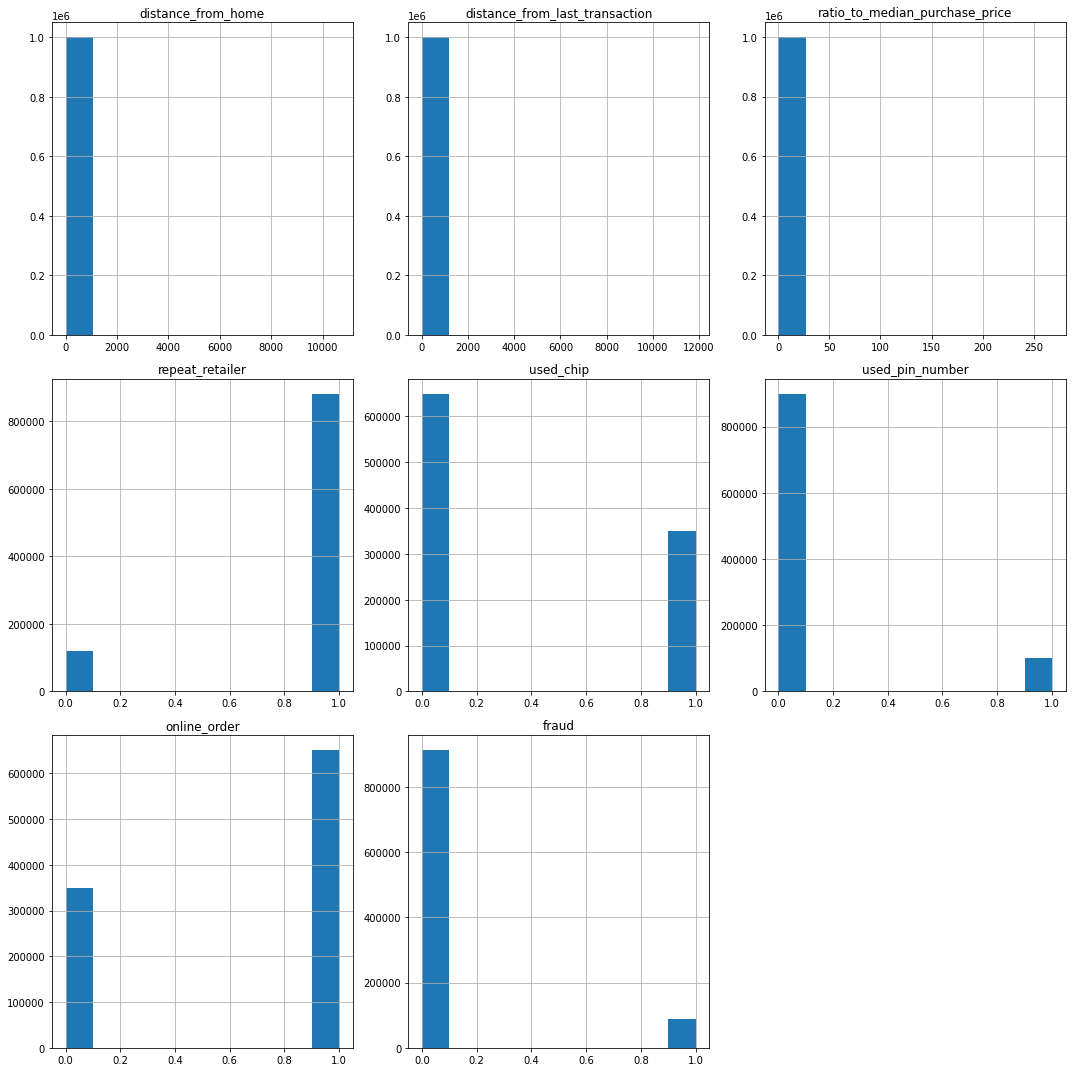

In [10]:
df.hist()

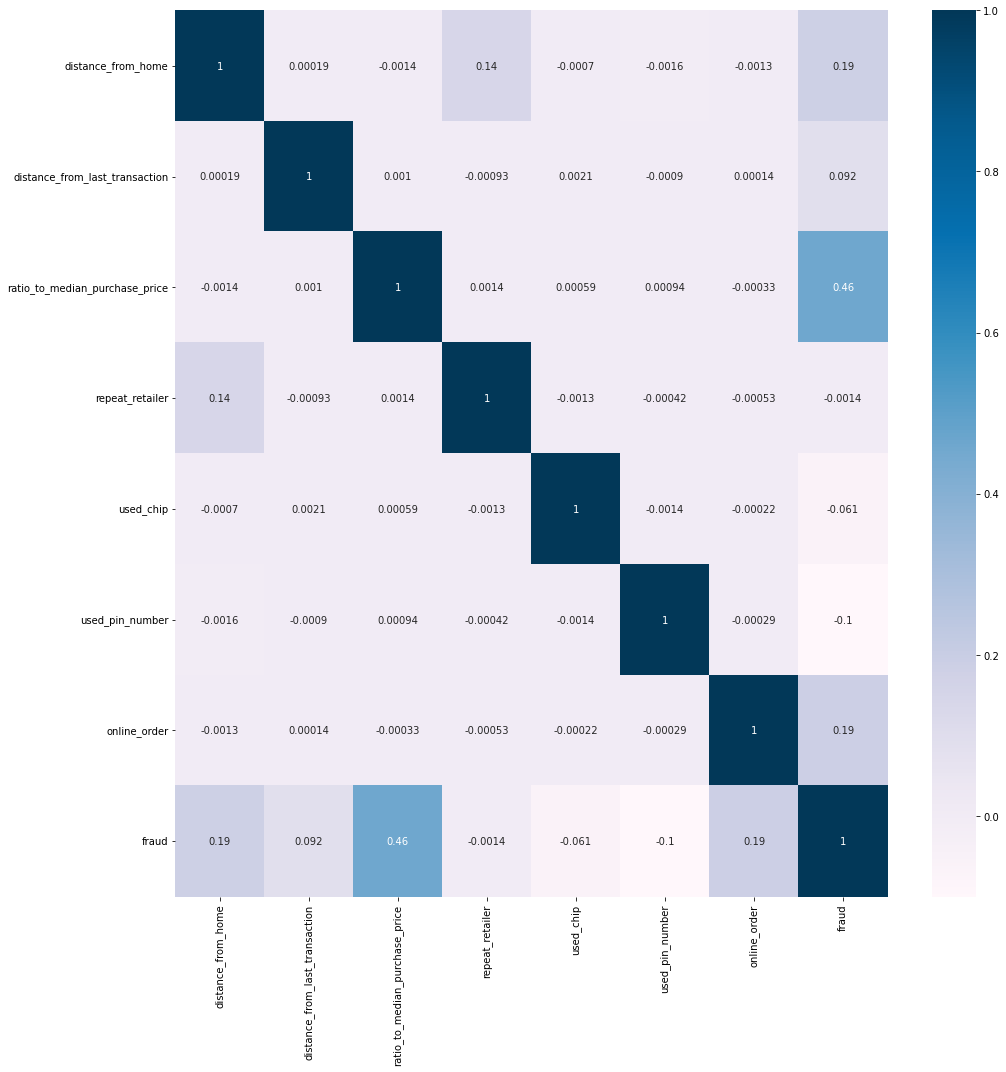

In [11]:
dfplot = sns.heatmap(df.corr(), cmap='PuBu', annot=True)

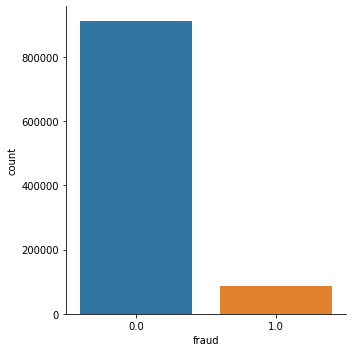

In [12]:
sns.catplot(x = 'fraud', kind='count', data=df)

In [7]:
from collections import Counter
print(df.fraud.unique())
Counter(df.fraud)

[0. 1.]


Counter({0.0: 912597, 1.0: 87403})

Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [15]:
rf = RandomForestClassifier(n_estimators=100)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']]
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [18]:
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [19]:
sel.get_support() 

array([False, False,  True, False, False, False,  True])

In [20]:
selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)

2

In [21]:
print(selected_feat)

Index(['ratio_to_median_purchase_price', 'online_order'], dtype='object')


Preprocessing

In [8]:
for i in['ratio_to_median_purchase_price',	'online_order']:
  df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))

In [9]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,0.007250,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,0.004816,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.001581,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.001338,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,0.008284,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,0.006058,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,0.010358,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.000798,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.001760,1.0,0.0,0.0,1.0,0.0


In [10]:
X = df[['ratio_to_median_purchase_price',	'online_order']]
y = df['fraud']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2, k_neighbors=5)

X_sm, y_sm = sm.fit_resample(X_train,y_train)

print(f'''Shape X sebelum SMOTE: {X.shape}
Shape y sebelum SMOTE: {y.shape}
Shape x setelah SMOTE: {X_sm.shape}
Shape y setelah SMOTE: {y_sm.shape}''')

# print('\nKeseimbangan kelas positive dan negative (%):')
# y_sm.value_counts(normalize=True)* 100

Shape X sebelum SMOTE: (1000000, 2)
Shape y sebelum SMOTE: (1000000,)
Shape x setelah SMOTE: (1642630, 2)
Shape y setelah SMOTE: (1642630,)


Modelling

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [38]:
n_estimators = (10, 100)
max_features=['auto', 'sqrt', 'log2']


In [39]:
param = {'n_estimators': n_estimators,
         'max_features': max_features}
print(param)

{'n_estimators': (10, 100), 'max_features': ['auto', 'sqrt', 'log2']}


In [30]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 12.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=86016eea48f09c56251bc3de093a6cea74ad2c9d8f2cb90309d1036dbe9ce9fe
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [40]:
from tpot import TPOTClassifier

In [41]:
tpot_classifier = TPOTClassifier(generations=5, population_size=24, offspring_size=12,verbosity=2, 
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier':param},
                                 cv=4, scoring='accuracy')

In [33]:
tpot_classifier.fit(X_adasyn, y_adasyn)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6805694673912441

Generation 2 - Current best internal CV score: 0.6805694673912441

Generation 3 - Current best internal CV score: 0.6805694673912441

Generation 4 - Current best internal CV score: 0.6805694673912441

Generation 5 - Current best internal CV score: 0.6805694673912441

Best pipeline: RandomForestClassifier(input_matrix, max_features=log2, n_estimators=10)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'max_features': ['auto',
                                                                                         'sqrt',
                                                                                         'log2'],
                                                                        'n_estimators': (10,
                                                                                         100)}},
               cv=4, generations=5, offspring_size=12, population_size=24,
               scoring='accuracy', verbosity=2)

In [42]:
tpot_classifier.fit(X_sm, y_sm)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -inf


RuntimeError: ignored

In [35]:
tpot_classifier.score(X_test, y_test)

0.63492

In [34]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = ()